In [93]:
%matplotlib inline
import GEOparse
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import decomposition
import matplotlib
from matplotlib.backends.backend_pgf import FigureCanvasPgf
matplotlib.backend_bases.register_backend('pdf', FigureCanvasPgf)

geo = "GSE171517"

In [94]:
data = GEOparse.get_GEO(geo=geo, destdir="../Dataset/Duan2021")

23-Oct-2021 15:59:35 DEBUG utils - Directory ../Dataset/Duan2021 already exists. Skipping.
23-Oct-2021 15:59:35 INFO GEOparse - File already exist: using local version.
23-Oct-2021 15:59:35 INFO GEOparse - Parsing ../Dataset/Duan2021\GSE171517_family.soft.gz: 
23-Oct-2021 15:59:35 DEBUG GEOparse - DATABASE: GeoMiame
23-Oct-2021 15:59:35 DEBUG GEOparse - SERIES: GSE171517
23-Oct-2021 15:59:35 DEBUG GEOparse - PLATFORM: GPL18058
23-Oct-2021 15:59:35 DEBUG GEOparse - SAMPLE: GSM5226511
23-Oct-2021 15:59:36 DEBUG GEOparse - SAMPLE: GSM5226512
23-Oct-2021 15:59:36 DEBUG GEOparse - SAMPLE: GSM5226513
23-Oct-2021 15:59:36 DEBUG GEOparse - SAMPLE: GSM5226514
23-Oct-2021 15:59:36 DEBUG GEOparse - SAMPLE: GSM5226515
23-Oct-2021 15:59:36 DEBUG GEOparse - SAMPLE: GSM5226516
23-Oct-2021 15:59:36 DEBUG GEOparse - SAMPLE: GSM5226517
23-Oct-2021 15:59:36 DEBUG GEOparse - SAMPLE: GSM5226518
23-Oct-2021 15:59:36 DEBUG GEOparse - SAMPLE: GSM5226519
23-Oct-2021 15:59:36 DEBUG GEOparse - SAMPLE: GSM5226520

In [95]:
data.gpls["GPL18058"].table.iloc[30:40]

,ID,Human_miRNA,Human_miRBase,Mouse_miRNA,Mouse_miRBase,Rat_miRNA,Rat_miRBase,miRNA_ID,SPOT_ID
30,10976,hsa-miR-182-3p,MIMAT0000260,mmu-miR-182-3p,MIMAT0016995,NaN,NaN,hsa-miR-182-3p,NaN
31,10977,hsa-miR-183-5p,MIMAT0000261,mmu-miR-183-5p,MIMAT0000212,rno-miR-183,MIMAT0000860,hsa-miR-183-5p,NaN
32,10985,hsa-miR-191-5p,MIMAT0000440,mmu-miR-191-5p,MIMAT0000221,rno-miR-191,MIMAT0000866,hsa-miR-191-5p,NaN
33,10986,hsa-miR-193a-3p,MIMAT0000459,mmu-miR-193-3p,MIMAT0000223,rno-miR-193,MIMAT0000868,hsa-miR-193a-3p,NaN
34,10987,hsa-miR-193b-3p,MIMAT0002819,NaN,NaN,NaN,NaN,hsa-miR-193b-3p,NaN
35,10988,hsa-miR-194-5p,MIMAT0000460,mmu-miR-194-5p,MIMAT0000224,rno-miR-194,MIMAT0000869,hsa-miR-194-5p,NaN
36,10990,hsa-miR-196a-5p,MIMAT0000226,mmu-miR-196a-5p,MIMAT0000518,rno-miR-196a,MIMAT0000871,hsa-miR-196a-5p,NaN
37,10991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10991
38,10995,hsa-miR-199a-3p/hsa-miR-199b-3p,NaN,mmu-miR-199a-3p/mmu-miR-199b-3p,NaN,rno-miR-199a-3p,MIMAT0004738,hsa-miR-199a-3p/hsa-miR-199b-3p,NaN
39,10997,hsa-miR-19a-3p,MIMAT0000073,mmu-miR-19a-3p,MIMAT0000651,rno-miR-19a,MIMAT0000789,hsa-miR-19a-3p,NaN


In [96]:
list(data.gsms.values())[0].metadata

{'title': ['LC_Serum_Exp1'],
 'geo_accession': ['GSM5226511'],
 'status': ['Public on Apr 06 2021'],
 'submission_date': ['Apr 05 2021'],
 'last_update_date': ['Apr 06 2021'],
 'type': ['RNA'],
 'channel_count': ['1'],
 'source_name_ch1': ['Serum, Lung Cancer Patient, Experimental Group, 01'],
 'organism_ch1': ['Homo sapiens'],
 'taxid_ch1': ['9606'],
 'characteristics_ch1': ['sample type: Serum',
  'pathology: SCC',
  'tnm: T2aN0M0',
  'Stage: IB',
  'disease state: lung cancer'],
 'molecule_ch1': ['total RNA'],
 'extract_protocol_ch1': ['Total RNA was isolated using TRI reagent BD (MRCgene, TB-126) according to manufacturerâ€™s instructions. RNA quality and quantity was measured by using nanodrop spectrophotometer (ND-1000, Nanodrop Technologies).'],
 'label_ch1': ['Hy3'],
 'label_protocol_ch1': ["After RNA isolation from the samples, the miRCURYâ„¢ Hy3â„¢/Hy5â„¢ Power labeling kit (Exiqon, Vedbaek, Denmark) was used according to the manufacturerâ€™s guideline for miRNA labelling. On

In [97]:
table = pd.concat([val.table.iloc[:,min(1,i):] for i, val in enumerate(data.gsms.values())], axis=1).transpose()

In [98]:
table = table.dropna(1)

C:\Users\OLEFRE~1\AppData\Local\Temp/ipykernel_10596/1927661217.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  table = table.dropna(1)


In [99]:
mirnas = table.iloc[0, :].transpose().astype(int)
table = table.iloc[1:, :]

In [100]:
np.mean(table)

0       31.557016
5        0.272795
7        1.298599
11       1.140279
12       0.104513
          ...    
3522     2.330647
3524    21.434297
3526     0.336214
3527     0.244579
3529    11.895344
Length: 786, dtype: float64

In [101]:
def get_means_and_variances(table):
    return np.mean(table), np.var(table, ddof=1)

In [102]:
def mean_variance_plot(table):
    means, variances = get_means_and_variances(table)
    plt.scatter(means, variances)
    plt.xlabel("mean")
    plt.ylabel("variance")
    plt.plot()

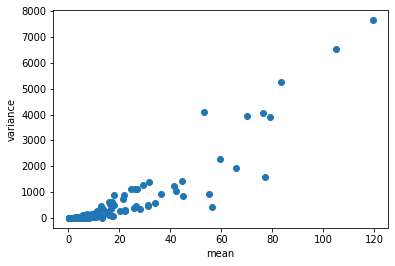

In [103]:
mean_variance_plot(table)

### Trying log-transformation

In [104]:
log_table = np.log2(table)

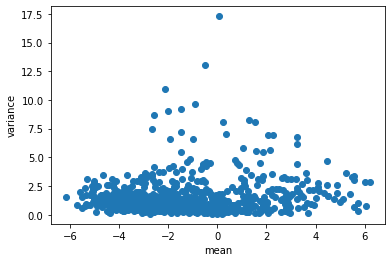

In [105]:
mean_variance_plot(log_table)

In [106]:
norm_log_table = log_table - np.mean(log_table)

In [107]:
norm_log_table /= np.sqrt(np.mean(np.var(norm_log_table, ddof=1)))

In [108]:
norm_log_table.var().mean()

1.0

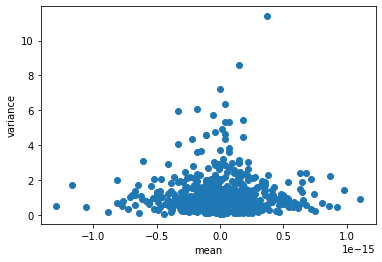

In [109]:
mean_variance_plot(norm_log_table)

In [110]:
pca = decomposition.PCA(n_components=2)

In [111]:
pca.fit(norm_log_table)

PCA(n_components=2)

In [112]:
components = pca.transform(norm_log_table)

In [113]:
components

array([[ -6.21440201, -17.3618018 ],
       [-20.7505224 ,   5.76397303],
       [-11.71988461,  17.60981366],
       [-15.95587241, -10.92963902],
       [-24.19338705, -12.6921618 ],
       [-17.33620535,  11.37262106],
       [-10.10962328,   5.3207337 ],
       [ 15.02551961,  18.93246637],
       [ 23.98893711,   8.79474481],
       [ 27.1258914 ,   1.59510228],
       [ 17.77063317, -18.32867776],
       [ 22.36891583, -10.07717453]])

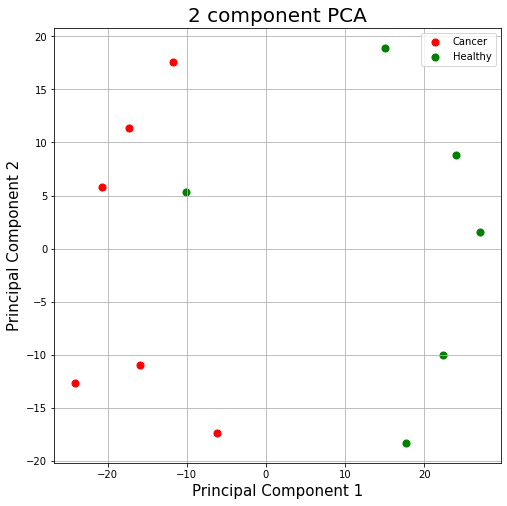

In [114]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Cancer', 'Healthy']
colors = ['r', 'g']
ax.scatter(components[:6, 0], components[:6, 1], c = 'r', s = 50)
ax.scatter(components[6:, 0], components[6:, 1], c = 'g', s = 50)
ax.legend(targets)
ax.grid()
plt.savefig("../Figures/PCA/Duan2021.pgf")

In [115]:
labels = np.array(["Control" if i > 6 else "Cancer" for i in range(12)])
pca_data = pd.DataFrame(components)
pca_data["Type"] = labels
pca_data.columns = ["PCA1", "PCA2", "Type"]
pca_data.to_csv("../Outdata/PCA/Duan2021.csv")

### Exporting data

In [116]:
id_lookup = data.gpls["GPL18058"].table
id_lookup.head()

,ID,Human_miRNA,Human_miRBase,Mouse_miRNA,Mouse_miRBase,Rat_miRNA,Rat_miRBase,miRNA_ID,SPOT_ID
0,10138,hsa-miR-130a-3p,MIMAT0000425,mmu-miR-130a-3p,MIMAT0000141,rno-miR-130a,MIMAT0000836,hsa-miR-130a-3p,NaN
1,10306,hsa-miR-146b-5p,MIMAT0002809,mmu-miR-146b-5p,MIMAT0003475,rno-miR-146b,MIMAT0005595,hsa-miR-146b-5p,NaN
2,105441,hsa-miR-518c-3p,MIMAT0002848,NaN,NaN,NaN,NaN,hsa-miR-518c-3p,NaN
3,10899,spike_control_v1_j,NaN,spike_control_v1_j,NaN,spike_control_v1_j,NaN,NaN,spike_control_v1_j
4,10901,hsa_negative_control_6,NaN,hsa_negative_control_6,NaN,hsa_negative_control_6,NaN,NaN,hsa_negative_control_6


In [117]:
id_lookup = id_lookup.set_index("ID")

In [118]:
id_lookup.loc[mirnas[:10]]

,Human_miRNA,Human_miRBase,Mouse_miRNA,Mouse_miRBase,Rat_miRNA,Rat_miRBase,miRNA_ID,SPOT_ID
ID,,,,,,,,
13138,Hy3,NaN,Hy3,NaN,Hy3,NaN,NaN,Hy3
46507,hsa-miR-921,MIMAT0004971,NaN,NaN,NaN,NaN,hsa-miR-921,NaN
42826,NaN,NaN,mmu-miR-300-5p,MIMAT0004578,rno-miR-300-5p,MIMAT0004743,NaN,42826
46636,NaN,NaN,mcmv-miR-M23-1-5p,MIMAT0005542,NaN,NaN,NaN,46636
11134,hsa-miR-502-5p,MIMAT0002873,NaN,NaN,NaN,NaN,hsa-miR-502-5p,NaN
17295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17295
42812,hsa-miR-508-5p,MIMAT0004778,NaN,NaN,NaN,NaN,hsa-miR-508-5p,NaN
42469,NaN,NaN,mmu-miR-181a-2-3p,MIMAT0005443,NaN,NaN,NaN,42469
27575,NaN,NaN,mmu-miR-711,MIMAT0003501,NaN,NaN,NaN,27575


In [119]:
mirbase_ids = id_lookup.loc[mirnas]["Human_miRBase"]

In [120]:
mask = np.logical_not(mirbase_ids.isna()).to_numpy()

In [121]:
mask[:10]

array([False,  True, False, False,  True, False,  True, False, False,
       False])

In [122]:
mirbase_ids = mirbase_ids[mask]

In [123]:
norm_log_table = norm_log_table.loc[:, mask]

In [124]:
from Scripts import converters

In [125]:
sequences = converters.mirbase_to_seq(mirbase_ids, ignore_not_found=True)

In [126]:
sequences.count(None)

2

In [127]:
sequences = np.array(sequences)

In [128]:
mask = sequences != None

In [129]:
sequences = sequences[mask]
norm_log_table = norm_log_table.loc[:, mask]

In [131]:
norm_log_table /= norm_log_table.var().mean()**0.5

In [132]:
norm_log_table.columns = sequences
norm_log_table["cancer"] = np.array(6*[True] + 6*[False])

In [133]:
norm_log_table.to_csv("../TransformedData/Duan2021.csv", index=False)